<a href="https://colab.research.google.com/github/VidyaValsalan/Prediction-with-DeepLearning/blob/master/LSTM-RL-Prediction/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving excel_model_15.csv to excel_model_15 (3).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "excel_model_15.csv" with length 5019 bytes


In [ ]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['excel_model_15.csv'].decode('utf-8')),names=['date','4599','4291','5054','2157','4234','1018','22420','18494','19505','10215','11478','13223','16309','370'])
df1.head(5)
a=input('Enter the Location ID')

Enter the Location ID2157


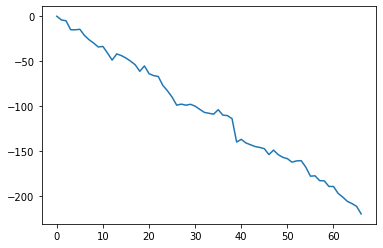

In [ ]:
df1=df1.reset_index()[a]
df1.plot()
d=df1

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 4, 50)             10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 4, 50)             20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=800,batch_size=64,verbose=1)

Epoch 1/800
1/1 [==============================] - 0s 46ms/step - loss: 9.3675e-04 - val_loss: 0.0013
Epoch 2/800
1/1 [==============================] - 0s 20ms/step - loss: 9.3635e-04 - val_loss: 0.0013
Epoch 3/800
1/1 [==============================] - 0s 20ms/step - loss: 9.3594e-04 - val_loss: 0.0013
Epoch 4/800
1/1 [==============================] - 0s 19ms/step - loss: 9.3554e-04 - val_loss: 0.0013
Epoch 5/800
1/1 [==============================] - 0s 20ms/step - loss: 9.3513e-04 - val_loss: 0.0013
Epoch 6/800
1/1 [==============================] - 0s 20ms/step - loss: 9.3471e-04 - val_loss: 0.0013
Epoch 7/800
1/1 [==============================] - 0s 19ms/step - loss: 9.3430e-04 - val_loss: 0.0013
Epoch 8/800
1/1 [==============================] - 0s 19ms/step - loss: 9.3388e-04 - val_loss: 0.0013
Epoch 9/800
1/1 [==============================] - 0s 19ms/step - loss: 9.3346e-04 - val_loss: 0.0013
Epoch 10/800
1/1 [==============================] - 0s 20ms/step - loss: 9.3304e-0

In [ ]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.02459953829109567

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.023332257259597967

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

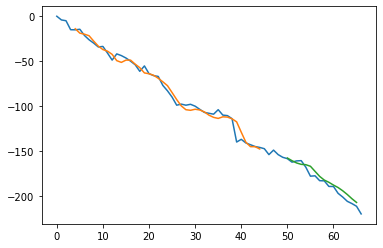

In [ ]:
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
len(test_data)

21

In [ ]:
x_input=test_data[17:].reshape(1,-1)
x_input.shape

(1, 4)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=4
i=0
while(i<60):
    
    if(len(temp_input)>4):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.0246286]
5
1 day input [0.05227273 0.03863636 0.         0.0246286 ]
1 day output [[0.01098003]]
2 day input [0.03863636 0.         0.0246286  0.01098003]
2 day output [[0.00235395]]
3 day input [0.         0.0246286  0.01098003 0.00235395]
3 day output [[-0.00211814]]
4 day input [ 0.0246286   0.01098003  0.00235395 -0.00211814]
4 day output [[-0.00570562]]
5 day input [ 0.01098003  0.00235395 -0.00211814 -0.00570562]
5 day output [[-0.01264985]]
6 day input [ 0.00235395 -0.00211814 -0.00570562 -0.01264985]
6 day output [[-0.01778645]]
7 day input [-0.00211814 -0.00570562 -0.01264985 -0.01778645]
7 day output [[-0.02265748]]
8 day input [-0.00570562 -0.01264985 -0.01778645 -0.02265748]
8 day output [[-0.02782284]]
9 day input [-0.01264985 -0.01778645 -0.02265748 -0.02782284]
9 day output [[-0.03297098]]
10 day input [-0.01778645 -0.02265748 -0.02782284 -0.03297098]
10 day output [[-0.03779536]]
11 day input [-0.02265748 -0.02782284 -0.03297098 -0.03779536]
11 day output [[-0.042601

In [ ]:
day_new=np.arange(1,5)
day_pred=np.arange(5,65)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

67

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

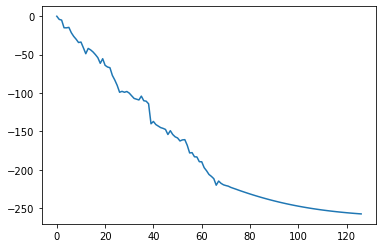

In [ ]:
plt.plot(df3)

In [ ]:
df3[67:127]

[[-214.58170797675848],
 [-217.5843932852149],
 [-219.48213152587414],
 [-220.46599008142948],
 [-221.25523664057255],
 [-222.78296802192926],
 [-223.91301915049553],
 [-224.9846464395523],
 [-226.12102583050728],
 [-227.25361473858356],
 [-228.31497944891453],
 [-229.37222830951214],
 [-230.41672967374325],
 [-231.43353961408138],
 [-232.4264182895422],
 [-233.40137965977192],
 [-234.35417920351028],
 [-235.28433173894882],
 [-236.19319200515747],
 [-237.08071738481522],
 [-237.94636368751526],
 [-238.79045218229294],
 [-239.6131730079651],
 [-240.41454911231995],
 [-241.19468867778778],
 [-241.95380479097366],
 [-242.69207119941711],
 [-243.4096845984459],
 [-244.106864631176],
 [-244.78387027978897],
 [-245.44095396995544],
 [-246.07840090990067],
 [-246.69649630784988],
 [-247.29556798934937],
 [-247.87593066692352],
 [-248.4379056096077],
 [-248.98185342550278],
 [-249.50813800096512],
 [-250.0171035528183],
 [-250.5091369152069],
 [-250.9846019744873],
 [-251.44389867782593],
 [-